<a href="https://colab.research.google.com/github/prabirdeb/Automated-Question-Answering-System/blob/main/Automated_Question_Answering_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Automated Question-Answering**

## <b> Problem Description </b>

### In this project, at first our task is to create a dataset of datascience documents and then extract the topics of the documents and finally build a automated question answering model which will  retrieve the relevant document and generate the answer for the question

# **Exploration and Pre-processing of Data**

This involves following steps to transform raw data into quality data for the deep learning model 

## **1. Connection with the Data**

Here, the dataset is the gist of my learning experiences in Almabetter stored in an excel file.

At first, we import the libraries or functions for **making our journey easy** and then **get connected** to the set of experiences.

In [1]:
# Importing libraries

# Data handling
import numpy as np
import pandas as pd

# machine learning
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Text processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Importing deep learning libraries

In [3]:
# !pip install streamlit

In [4]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 28.0 MB/s 
     |████████████████████████████████| 596 kB 45.2 MB/s 
     |████████████████████████████████| 6.5 MB 46.1 MB/s 
     |████████████████████████████████| 895 kB 54.5 MB/s 
     |████████████████████████████████| 67 kB 4.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
from transformers import pipeline
ques_ans_pipeline = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [6]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 11.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=0bb3892da03e9013f7156b56997a4de7a88193d3f0f5be33cf40dd33e4b30567
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [7]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Reading the data as pandas dataframe
xls = pd.ExcelFile('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/Automated Question Answering System-Prabir Debnath/data.xlsx')
xls.sheet_names

['Concepts']

In [10]:
data_science_df = pd.read_excel(xls, 'Concepts')

## **2. First Feelings of the Data**

As there is a huge no. of experiences, we cannot see the whole lot of experiences and therefore we find the features on the **data head**.

In [11]:
data_science_df.head(2)

,Concept-1,Concept-2,Concept-3,Concept-4,Concept-5,Concept-6,Concept-7,Concept-8,Concept-9,Concept-10,...,Concept-12,Concept-13,Concept-14,Concept-15,Concept-16,Concept-17,Concept-18,Concept-19,Concept-20,Unnamed: 20
0,Python language was created in 1991.\n\ntokens...,There are 32 keywords in C++ and 35 keywords i...,"data types in python are Numeric, Boolean, Str...","Integers or whole numbers are 1,2,-5,1000, Flo...","Arithmatic Operations are addition[+], subtrac...","In mathematics and computer science, the floor...",Variable is the storing place in computer memo...,Variable name must start with letter or unders...,Boolean Variable are true or false.\n\nCompari...,"A Perfect number, is a positive integer that i...",...,"To get the absolute value, we use abs(5.8-7.8)...",The del keyword in python is primarily used to...,The order of precedence in python is Parenthes...,int(True) gives result 1 and int(False) gives 0.,An application or app or software or model is ...,"a += 2 means first add 2 with ""a"" and then sav...","Four basic answers of any question are yes, no...",\nExample of logical resoning is\n\nStatement:...,The pprint module provides a capability to “pr...,NaN
1,"A string can be a word, a phrase, a sentence, ...",String has a sequence and thus it has indexing.,String can be in single or double quote. doubl...,"to print a new line, we use print('Use \n to ...",string indexing begins from 0.,"For Grabbing the element by index, we use\n\np...","For String Slicing, we use\n\n[starting index:...",If you do not specify the starting and the end...,"slicing with step size, string[3:14:2] means f...",str' object does not support item assignment m...,...,"String functions are print(), type(), len().\n...","String methods are\n\nstring.lower(), string.u...",f-strings provide a way to embed expressions i...,my_string = 'Albert Einstein' \n\n'Albert' i...,String duplication occurs when we multiply str...,"For taking user's input, we use\n\ninputted_nu...",\n\nA string can be called a safe bridge if it...,"for color print, we use\n\nfrom termcolor impo...","For String matching, we use\n\nimport re\n pat...",NaN


## **3. Deeper Understanding of the Data**

As there is a huge no. of experiences, we take the help of **statistics to measure** each and every features in different dimensions.

In [12]:
data_science_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Concept-1    99 non-null     object
 1   Concept-2    94 non-null     object
 2   Concept-3    94 non-null     object
 3   Concept-4    92 non-null     object
 4   Concept-5    92 non-null     object
 5   Concept-6    88 non-null     object
 6   Concept-7    87 non-null     object
 7   Concept-8    86 non-null     object
 8   Concept-9    83 non-null     object
 9   Concept-10   79 non-null     object
 10  Concept-11   76 non-null     object
 11  Concept-12   71 non-null     object
 12  Concept-13   65 non-null     object
 13  Concept-14   59 non-null     object
 14  Concept-15   54 non-null     object
 15  Concept-16   44 non-null     object
 16  Concept-17   40 non-null     object
 17  Concept-18   37 non-null     object
 18  Concept-19   30 non-null     object
 19  Concept-20   23 non-null     ob

## **4. Cleaning the Data**

In this step, we treat null, missing, "?" or duplicate values.

We check the statistics further on clean data.

Creating Dataset with Relevant Features

In [13]:
relavant_features=['Concept-1', 'Concept-2', 'Concept-3', 'Concept-4', 'Concept-5',
       'Concept-6', 'Concept-7', 'Concept-8', 'Concept-9', 'Concept-10',
       'Concept-11', 'Concept-12', 'Concept-13', 'Concept-14', 'Concept-15',
       'Concept-16', 'Concept-17', 'Concept-18', 'Concept-19', 'Concept-20']

In [14]:
data_science_df_clean=data_science_df[relavant_features]

In [15]:
# Creating documents with all individual cell
data_science_df_clean=pd.DataFrame(data_science_df_clean.values.flatten(), columns=['documents'])
data_science_df_clean.head(2)

,documents
0,Python language was created in 1991.\n\ntokens...
1,There are 32 keywords in C++ and 35 keywords i...


In [16]:
# Removing null value rows
data_science_df_clean.dropna(inplace=True) 

In [17]:
data_science_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1971
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   documents  1393 non-null   object
dtypes: object(1)
memory usage: 21.8+ KB


In [18]:
# Checking no data in any row
data_science_df_clean[(data_science_df_clean['documents']=='No data')]

,documents
480,No data
760,No data
1300,No data
1320,No data
1420,No data


In [19]:
# Removing all the rows with no data and reseting index 
data_science_df_clean=data_science_df_clean[(data_science_df_clean['documents']!='No data')].reset_index()

In [20]:
data_science_df_clean.drop('index',axis=1, inplace=True)

In [21]:
data_science_df_clean['documents']

0       Python language was created in 1991.\n\ntokens...
1       There are 32 keywords in C++ and 35 keywords i...
2       data types in python are Numeric, Boolean, Str...
3       Integers or whole numbers are 1,2,-5,1000, Flo...
4       Arithmatic Operations are addition[+], subtrac...
                              ...                        
1383    Attention model\n\nFor long sequence normal ma...
1384    Blue Score\n\nIt is used to measure the perfor...
1385    Audio data: speech recognition\n\nThis is a se...
1386    Basic Rule of CTC based technique\n\nCollapse ...
1387    Audio Data: Trigger word detection\n\ne.g. Ale...
Name: documents, Length: 1388, dtype: object

Let's develop a list of the top words used across the documents, which gives us a glimpse into the core vocabulary of the source data. Stop words are omitted here to avoid any trivial conjunctions, prepositions, etc.

Text Pre-processing

In [22]:
# writing text pre-processing function
def text_process(text):
    text = text.lower()
    nopunc =[char for char in text if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [23]:
# Wrting top words function
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_documents = count_vectorizer.fit_transform(text_data.apply(text_process).values) # also performing text processing
    vectorized_total = np.sum(vectorized_documents, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_documents.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

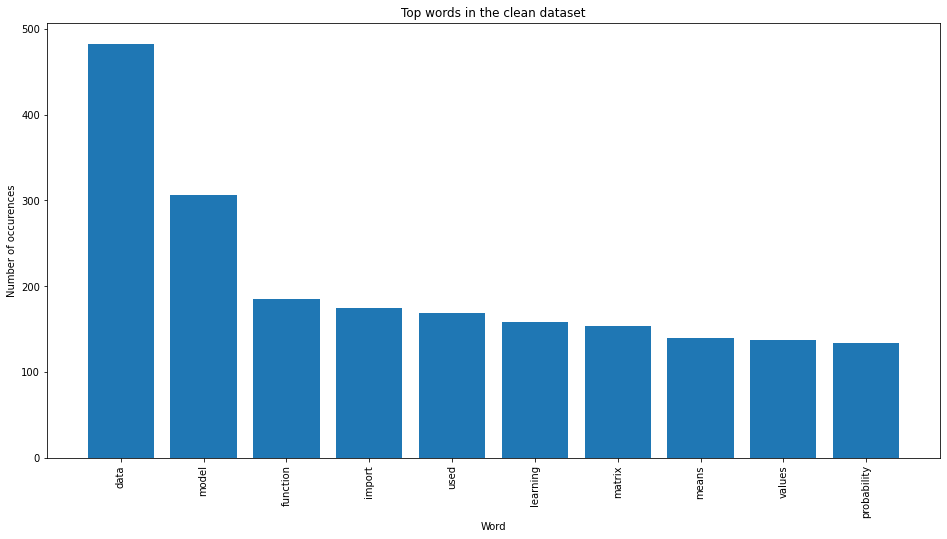

In [24]:
# Ploting top words in the entire dataset
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=10,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=data_science_df_clean['documents'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in the clean dataset')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

## **5. Preparation of Input Data**

In [25]:
# Document processing
data_science_df_clean['documents_processed'] = data_science_df_clean['documents'].apply(text_process)

In [26]:
data_science_df_clean.head(2)

,documents,documents_processed
0,Python language was created in 1991.\n\ntokens...,python language created 1991 tokens smallest m...
1,There are 32 keywords in C++ and 35 keywords i...,32 keywords c 35 keywords python python keywor...


In [27]:
# vectorization of documents
count_vectorizer = CountVectorizer(stop_words='english', max_features=4000)

text_sample = data_science_df_clean.documents_processed.values

print('Document before vectorization: {}'.format(text_sample[0]))

document_term_matrix = count_vectorizer.fit_transform(text_sample)

print('Document after vectorization: \n{}'.format(document_term_matrix[0]))

Document before vectorization: python language created 1991 tokens smallest meaningful part statement expression command like computer programming language python tokens keywords basic words language identifiers programmer defined words program literals data data structure punctuations etc operators
Document after vectorization: 
  (0, 2601)	2
  (0, 1845)	3
  (0, 1008)	1
  (0, 3680)	2
  (0, 3357)	1
  (0, 2028)	1
  (0, 3497)	1
  (0, 1381)	1
  (0, 857)	1
  (0, 1895)	1
  (0, 905)	1
  (0, 2514)	1
  (0, 1817)	1
  (0, 413)	1
  (0, 3931)	2
  (0, 1644)	1
  (0, 1093)	1
  (0, 2512)	1
  (0, 1919)	1
  (0, 1050)	2
  (0, 3548)	1
  (0, 2564)	1
  (0, 2276)	1


# **Building of Topic Model**

Building LDA model with sklearn and hyperparameter tuning

In [28]:
lda = LatentDirichletAllocation()

grid_params={'n_components': list(range(5,10)), 'learning_decay': [.5, .7, .9]}

lda_model = GridSearchCV(lda,param_grid=grid_params)

lda_model.fit(document_term_matrix)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 6, 7, 8, 9]})

Let's see the best topic model and its parameters

In [29]:
# Best Model
best_lda_model = lda_model.best_estimator_

# Model Parameters
print("Best Model's Params: ", lda_model.best_params_)

# Perplexity
print("Model Perplexity: ", round(best_lda_model.perplexity(document_term_matrix),2))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 5}
Model Perplexity:  2111.69


Let's visualize the LDA model with pyLDAvis

In [30]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix,count_vectorizer,mds='tsne')
lda_panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  27.054494
4       51.163364 -159.968018       2        1  20.722623
2      -73.144554   21.523815       3        1  19.520829
0      -66.410133 -110.606438       4        1  16.899491
3       54.417324   12.443444       5        1  15.802562, topic_info=              Term        Freq       Total Category  logprob  loglift
2017        matrix  132.000000  132.000000  Default  30.0000  30.0000
2088         model  271.000000  271.000000  Default  29.0000  29.0000
3839        vector   76.000000   76.000000  Default  28.0000  28.0000
1203  distribution  106.000000  106.000000  Default  27.0000  27.0000
2493   probability  117.000000  117.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
1419      features   14.183297   75.752301   Topic5  -5.7568   0.1696
1171     different   13.947429   91.470916   Topic5  -5.7736  -0.0357
1494      function   13.770862  162.226028   Topic5  -5.7863  -0.6214
1916          list   13.014080   72.676073   Topic5  -5.8428   0.1250
1905        linear   12.626373   68.725304   Topic5  -5.8731   0.1507

[356 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
54        5  0.932299       246
96        3  0.917215        95
114       1  0.058060  accuracy
114       3  0.174181  accuracy
114       4  0.116120  accuracy
...     ...       ...       ...
3970      5  0.875566        xy
3971      1  0.097013       xyz
3971      5  0.873118       xyz
3990      3  0.859769    zscore
3998      3  0.955395        σ2

[631 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 1, 4])

Let's see the dominant topic in each document

In [31]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(document_term_matrix) # Takes word presence embeding as input and gives contextual embedding as output

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data_science_df_clean['documents']))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.010000,0.300000,0.010000,0.680000,0.010000,3
Doc1,0.010000,0.010000,0.280000,0.700000,0.010000,3
Doc2,0.030000,0.030000,0.900000,0.030000,0.030000,2
Doc3,0.010000,0.010000,0.950000,0.010000,0.010000,2
Doc4,0.010000,0.640000,0.010000,0.320000,0.010000,1
Doc5,0.010000,0.010000,0.010000,0.970000,0.010000,3
Doc6,0.010000,0.010000,0.010000,0.960000,0.010000,3
Doc7,0.010000,0.970000,0.010000,0.010000,0.010000,1
Doc8,0.190000,0.020000,0.750000,0.020000,0.020000,2
Doc9,0.470000,0.020000,0.020000,0.480000,0.020000,3


Review topics distribution across documents

In [32]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,1,360
1,4,281
2,2,276
3,0,260
4,3,211


Let's see the Topic’s keywords

In [33]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = count_vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,005,02,049,05,09mindf,10,100,1000,10k,...,zscore,zwx,γu,θt,θx1,μ1,μ2,σ1,σ2,σz
Topic0,1.134750,0.200001,1.200075,4.199996,0.200008,1.199780,3.436796,1.282782,1.199330,0.200003,...,0.200485,0.200001,0.200001,0.200001,0.200002,0.200002,0.200002,0.200003,0.200872,0.200001
Topic1,2.184287,0.200001,1.199407,0.200001,1.726211,0.200004,3.070158,4.198621,0.200002,4.199837,...,0.200001,0.200001,3.199996,0.201299,0.200001,0.200001,0.200001,0.200002,0.200001,0.200001
Topic2,0.280944,3.199997,0.200511,0.200001,1.671935,1.200207,5.801705,0.200003,0.201409,0.200155,...,7.199511,0.200001,0.200001,0.200001,2.199994,3.199994,2.199994,4.199991,11.198858,2.199997
Topic3,0.200010,0.200001,0.200004,0.200001,3.197553,0.200006,1.559116,5.118590,4.199257,0.200003,...,0.200002,3.199996,0.200001,0.200001,0.200002,0.200002,0.200002,0.200003,0.200002,0.200001
Topic4,0.200009,0.200001,0.200004,0.200001,0.204293,0.200004,4.132225,0.200003,0.200002,0.200002,...,0.200001,0.200001,0.200001,3.198698,0.200001,0.200001,0.200001,0.200002,0.200266,0.200001


Get the top 15 keywords each topic

In [34]:
# Show top n keywords for each topic
def show_topics(vectorizer=count_vectorizer, lda_model=best_lda_model, n_words=15):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=count_vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,set,file,list,data,plot,array,time,event,pandas,probability,python,means,create,application,used
Topic 1,data,layer,learning,multiple,image,use,input,output,regression,used,docker,word,file,means,machine
Topic 2,function,probability,distribution,random,sample,value,mean,used,number,population,import,test,values,gradient,returns
Topic 3,matrix,vector,data,model,error,values,dataset,number,language,like,user,square,set,dimension,time
Topic 4,model,data,import,learning,training,ml,network,neural,classification,dataset,table,models,machine,experience,different


# **Building of Question-Answering Model**

In [35]:
question="what is  Identifiers?"
question_processed = text_process(question)
question_processed

'identifiers'

In [36]:
# Appending question in the dataset to match the dimension of question and document vector
data_science_df_clean=data_science_df_clean[(data_science_df_clean.documents!=data_science_df_clean.documents_processed)]
data_science_df_clean.loc[(data_science_df_clean.index.max()+1)] = question_processed
data_science_df_clean.tail(2)

,documents,documents_processed
1387,Audio Data: Trigger word detection\n\ne.g. Ale...,audio data trigger word detection eg alexa oka...
1388,identifiers,identifiers


In [37]:
# vectorization of text samples
count_vectorizer_model = CountVectorizer(stop_words='english', max_features=4000) # Downloading pre-trained vectorization model (CountVectorizer)
document_term_matrix = count_vectorizer_model.fit_transform(data_science_df_clean.documents_processed.values)
print('Document after vectorization: \n{}'.format(document_term_matrix[-1:])) # Checking the vector for the question

Document after vectorization: 
  (0, 1644)	1


CountVec and Question-Answering Model

In [45]:
# CountVec question-answering model
topic_match=[]
count=0
vec_1=document_term_matrix[-1:]     # Question vector
for k in range(len(data_science_df_clean.documents[:-1])):
  vec_2=document_term_matrix[k:(k+1)]     # Individual document vector
  topic_match.append(cosine_similarity(vec_1 , vec_2)[0][0])
  
try:
  
  for i in topic_match:
    if i>0.9*max(topic_match):
      context=data_science_df_clean.documents[topic_match.index(i)]
      ans = ques_ans_pipeline(question=question, context=context)
      if ans['score']>0.5:   # Deciding the margins through hit and trial for perfect answer
        # answer=answer+' | '+ans['answer']
        print(ans)
        print(f"\nMatching of question with context: {round(i,2)}")
        print(f"Detailed answer:\n{data_science_df_clean.documents[topic_match.index(i)]}")
        # print(f"\nAnswer: {answer}")
        count=count+1
  if count==0:
    print("Sorry ! I have no experience for this question.")

except:
  print("There is an exception")  

{'score': 0.883843719959259, 'start': 238, 'end': 277, 'answer': 'programmer defined words of any program'}

Matching of question with context: 0.15
Detailed answer:
Python language was created in 1991.

tokens are the smallest meaningful part of any statement or expression or command. Like any other computer programming language, python tokens are Keywords (basic words of any language), Identifiers (programmer defined words of any program), Literals (data or data structure), Punctuations (, : etc) and Operators (+_*/).



LDA and Question-Answering Model

In [46]:
document_lda_matrix=best_lda_model.transform(document_term_matrix)
document_lda_matrix[0]

array([0.00690345, 0.3001133 , 0.00676728, 0.67945982, 0.00675615])

In [47]:
# # LDA question-answering model
# CountVec question-answering model
topic_match=[]
count=0
vec_1=document_lda_matrix[-1:]     # Question vector
for k in range(len(data_science_df_clean.documents[:-1])):
  vec_2=document_lda_matrix[k:(k+1)]     # Individual document vector
  topic_match.append(cosine_similarity(vec_1 , vec_2)[0][0])
  
try:
  
  for i in topic_match:
    if i>0.9*max(topic_match):
      context=data_science_df_clean.documents[topic_match.index(i)]
      ans = ques_ans_pipeline(question=question, context=context)
      if ans['score']>0.5:   # Deciding the margins through hit and trial for perfect answer
        # answer=answer+' | '+ans['answer']
        print(ans)
        print(f"\nMatching of question with context: {round(i,2)}")
        print(f"Detailed answer:\n{data_science_df_clean.documents[topic_match.index(i)]}")
        # print(f"\nAnswer: {answer}")
        count=count+1
  if count==0:
    print("Sorry ! I have no experience for this question.")

except:
  print("There is an exception")  

{'score': 0.883843719959259, 'start': 238, 'end': 277, 'answer': 'programmer defined words of any program'}

Matching of question with context: 0.94
Detailed answer:
Python language was created in 1991.

tokens are the smallest meaningful part of any statement or expression or command. Like any other computer programming language, python tokens are Keywords (basic words of any language), Identifiers (programmer defined words of any program), Literals (data or data structure), Punctuations (, : etc) and Operators (+_*/).

{'score': 0.6692280769348145, 'start': 40, 'end': 70, 'answer': 'Handling Errors and Exceptions'}

Matching of question with context: 0.96
Detailed answer:
1. Object Oriented Programming (OOP)
2. Handling Errors and Exceptions
{'score': 0.8952135443687439, 'start': 245, 'end': 267, 'answer': 'pandas data structures'}

Matching of question with context: 0.95
Detailed answer:
Editing the plot area with matplotlib and seaborn

plt.title('my_chart_title')
plt.ylabel('chart

Here, LDA vectors are usefull in matching the topic of question with document and thus giving good answer

In [41]:
# from transformers import BertForQuestionAnswering, AutoTokenizer

# modelname = 'deepset/bert-base-cased-squad2'

# model = BertForQuestionAnswering.from_pretrained(modelname)
# tokenizer = AutoTokenizer.from_pretrained(modelname)

In [42]:
# import streamlit as st
# from transformers import pipeline

# @st.cache(allow_output_mutation=True)
# def load_qa_model():
#     model = pipeline("question-answering")
#     return model

# qa = load_qa_model()
# st.title("Ask Questions about your Text")
# sentence = st.text_area('Please paste your article :', height=30)
# question = st.text_input("Questions from this article?")
# button = st.button("Get me Answers")
# max = st.sidebar.slider('Select max', 50, 500, step=10, value=150)
# min = st.sidebar.slider('Select min', 10, 450, step=10, value=50)
# do_sample = st.sidebar.checkbox("Do sample", value=False)
# with st.spinner("Discovering Answers.."):
#     if button and sentence:
#         answers = qa(question=question, context=sentence)
#         st.write(answers['answer'])

# **Conclusion**